In [74]:
import pandas as pd
import os
import glob
os.chdir("C:\\Users\\nithy\\OneDrive\\Desktop\\CUDA\\vector")
txt_files = glob.glob("./*.txt")
len(txt_files)

208

In [2]:
for i,file in enumerate(txt_files):
    a=open(file,'r')
    lines=a.readlines()

    import re
    with open(file+'_'+str(i), "w+") as newfile:
        regex1=re.compile('^smsp_')
        for line in lines:
            l=line.strip()
            if(l):
                if(regex1.match(l)):
                    newfile.write(l+'\n')
    a.close()
    newfile.close()

    tokens=[]
    ca=open(file+'_'+str(i),'r')
    lines=ca.readlines()
    for line in lines:
        l=line.strip()
        tokens.append(l.split())
    ca.close()

    import csv
    columns=[]
    rows=[]
    with open (file+'_'+str(i)+".csv","a") as c:
        writer = csv.writer(c, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        for t in tokens:
            cols=columns.append(t[0])
            s=t[2]
            if('.' in s):
                s=s.replace(".","")
            r=rows.append(int(s.replace(",","")))
        writer.writerow([col for col in columns])
        writer.writerow([r for r in rows])

In [73]:
csv_files = glob.glob("./*.csv")
for i,f in enumerate(csv_files):
    if(i==0):
        df=pd.read_csv(f)
    if(i>0):
        df1=pd.read_csv(f)
        df=df.append(df1.iloc[[0]])
len(df)

115

In [38]:
os.chdir("C:\\Users\\nithy\\OneDrive\\Desktop\\CUDA\\time\\")
txt_files = glob.glob("./*.txt")
for i,f in enumerate(txt_files):
    if(i==0):
        d1=pd.read_csv(f,delimiter=';')
        d1=d1['Time']
    if(i>0):
        d2=pd.read_csv(f,delimiter=';')
        d2=d2['Time']
        d1=d1.append(d2.iloc[[0]])

In [39]:
d11=d1
for i,f in enumerate(txt_files):
    if(i==0):
        d1=pd.read_csv(f,delimiter=';')
        d1=d1['Threads']
    if(i>0):
        d2=pd.read_csv(f,delimiter=';')
        d2=d2['Threads']
        d1=d1.append(d2.iloc[[0]])

In [ ]:
d11=d1
for i,f in enumerate(txt_files):
    if(i==0):
        d1=pd.read_csv(f,delimiter=';')
        d1=d1['Dims']
    if(i>0):
        d2=pd.read_csv(f,delimiter=';')
        d2=d2['Dims']
        d1=d1.append(d2.iloc[[0]])

In [40]:
newd1=pd.concat([d11,d1],axis=1)
f=pd.concat([df,newd1],axis=1)

In [41]:
f.to_csv("vector2.csv")

In [42]:
f

,smsp__average_inst_executed_per_warp.ratio,smsp__inst_executed.sum,smsp__inst_executed_op_global_ld.sum,smsp__inst_executed_op_global_st.sum,smsp__inst_executed_op_shared_ld.sum,smsp__inst_executed_op_shared_st.sum,smsp__sass_thread_inst_executed_op_control_pred_on.sum,smsp__sass_thread_inst_executed_op_fp32_pred_on.sum,smsp__sass_thread_inst_executed_op_integer_pred_on.sum,smsp__sass_thread_inst_executed_op_memory_pred_on.sum,smsp__sass_thread_inst_executed_op_misc_pred_on.sum,Time,Threads
0,54913786,3843965,698890,349445,349445,349445,20168000,0,30253414,50420000,10084202,6.13674,202
0,55055086,3853856,700688,350344,350344,350344,20420000,0,30631020,51050000,10210612,6.17843,204
0,551927,3863489,702446,351223,0,0,10336000,0,62016206,31008000,10336412,20.13730,206
0,65388100,4577167,704174,352087,0,0,10462000,0,94158416,31386000,208,20.13810,208
0,55461571,3882310,705868,352934,0,0,10588000,0,63528210,31764000,10588420,20.15280,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,54164650,3249879,590876,295438,295438,295438,18908000,0,28363344,47270000,9454192,6.01149,192
0,54320586,3802441,691340,345670,345670,345670,19160000,0,28740970,47900000,9580582,6.75210,194
0,54472986,3813109,693286,346643,0,0,9706000,0,58236196,29118000,9706392,19.71990,196
0,64554057,4518784,695192,347596,0,0,9832000,0,88488396,29496000,198,19.95970,198


In [43]:
X1=f.drop(['smsp__average_inst_executed_per_warp.ratio'],axis=1)
X2=X1.drop(['smsp__sass_thread_inst_executed_op_fp32_pred_on.sum'],axis=1)
X3=X2.drop(['smsp__inst_executed_op_global_ld.sum'],axis=1)
X4=X3.drop(['smsp__inst_executed_op_global_st.sum'],axis=1)
X5=X4.drop(['smsp__inst_executed_op_shared_ld.sum'],axis=1)
X6=X5.drop(['smsp__inst_executed_op_shared_st.sum'],axis=1)
X=X6.loc[:,X6.columns!='Time']


In [72]:
X[5:6]

,smsp__inst_executed.sum,smsp__sass_thread_inst_executed_op_control_pred_on.sum,smsp__sass_thread_inst_executed_op_integer_pred_on.sum,smsp__sass_thread_inst_executed_op_memory_pred_on.sum,smsp__sass_thread_inst_executed_op_misc_pred_on.sum,Threads
0,3891475,21428000,32143484,53570000,10714212,212


<AxesSubplot:>

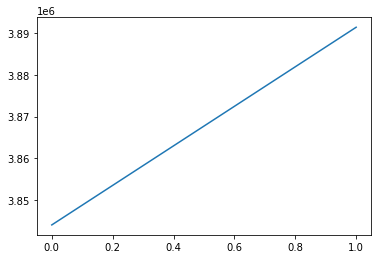

In [70]:
df=X['smsp__inst_executed.sum'][0:1]
df2=X['smsp__inst_executed.sum'][5:6]
df3=X['smsp__inst_executed.sum'][10:11]

df.append(df2).plot(use_index=False)

<AxesSubplot:>

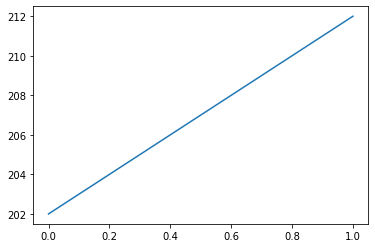

In [71]:
df1=X['Threads'][0:1]
df3=X['Threads'][5:6]
df1.append(df3).plot(use_index=False)

<AxesSubplot:>

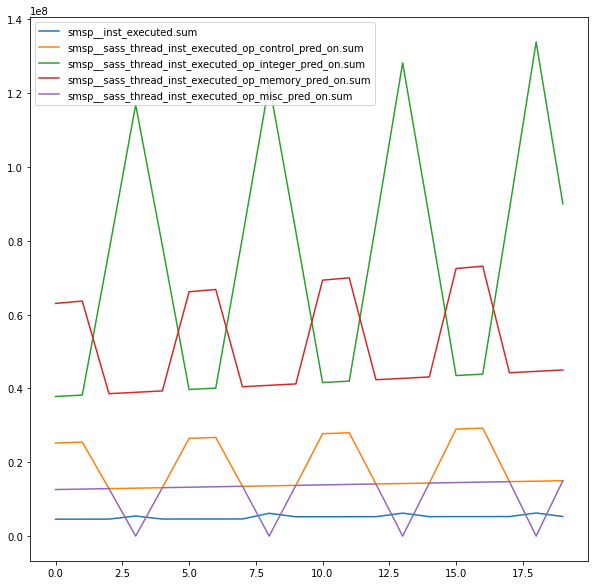

In [56]:
X.loc[:,X.columns!='Threads'][20:40].plot(use_index=False,figsize=(10,10))

<AxesSubplot:>

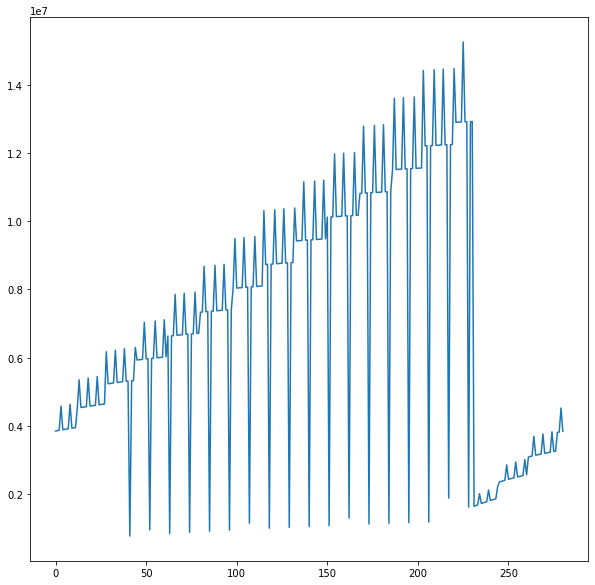

In [57]:
X['smsp__inst_executed.sum'].plot(use_index=False,figsize=(10,10))

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X.loc[:,X.columns!='Threads'])
X_minmax1=X['Threads'].to_numpy()
newX_minmax=np.append(X_minmax,X_minmax1.reshape(-1,1),axis=1)

In [12]:
y=f['Time']
new_y=np.array(y)

In [13]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.5)
reg=reg.fit(X_minmax, new_y)

In [14]:
from sklearn.linear_model import PoissonRegressor
poisson=PoissonRegressor()
p=poisson.fit(X_minmax, new_y)

In [15]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_minmax, new_y)

In [16]:
os.chdir("C:\\Users\\nithy\\OneDrive\\Desktop\\CUDA\\vdot")
txt_files = glob.glob("./*.txt")
len(txt_files)

18

In [17]:
csv_files = glob.glob("./*.csv")
for i,f in enumerate(csv_files):
    if(i==0):
        df=pd.read_csv(f)
    if(i>0):
        df1=pd.read_csv(f)
        df=df.append(df1.iloc[[0]])
test_df=df
len(test_df)

18

In [18]:
test_X2=test_df.drop(['smsp__average_inst_executed_per_warp.ratio'],axis=1)
test_X3=test_X2.drop(['smsp__sass_thread_inst_executed_op_fp32_pred_on.sum'],axis=1)
test_X4=test_X3.drop(['smsp__inst_executed_op_global_ld.sum'],axis=1)
test_X5=test_X4.drop(['smsp__inst_executed_op_global_st.sum'],axis=1)
test_X6=test_X5.drop(['smsp__inst_executed_op_shared_ld.sum'],axis=1)
test_X7=test_X6.drop(['smsp__inst_executed_op_shared_st.sum'],axis=1)

In [19]:
os.chdir("C:\\Users\\nithy\\OneDrive\\Desktop\\CUDA\\vdottime\\")
txt_files = glob.glob("./*.txt")
for i,f in enumerate(txt_files):
    if(i==0):
        d1=pd.read_csv(f,delimiter=';')
        d1=d1['Time']
    if(i>0):
        d2=pd.read_csv(f,delimiter=';')
        d2=d2['Time']
        d1=d1.append(d2.iloc[[0]])
test_d11=d1

In [20]:
for i,f in enumerate(txt_files):
    if(i==0):
        d1=pd.read_csv(f,delimiter=';')
        d1=d1['Threads']
    if(i>0):
        d2=pd.read_csv(f,delimiter=';')
        d2=d2['Threads']
        d1=d1.append(d2.iloc[[0]])
test_d1=d1

In [21]:
test_newd1=pd.concat([test_d11,test_d1],axis=1)
test_f=pd.concat([test_X7,test_newd1],axis=1)
test_X=test_f.loc[:,test_f.columns!='Time']
test_y=test_f['Time']

In [22]:
min_max_scaler = MinMaxScaler()
testX_minmax = min_max_scaler.fit_transform(test_X.loc[:,test_X.columns!='Threads'])
testX_minmax1=test_X['Threads'].to_numpy()
testnewX_minmax=np.append(testX_minmax,testX_minmax1.reshape(-1,1),axis=1)

In [23]:
reg.predict(testX_minmax)

array([11.56928739, 12.44274824, 13.3162091 , 14.18966995, 15.0631308 ,
       15.93659166, 16.81005251, 17.68351336, 18.55697422, 19.43043507,
       20.30389593, 21.17735678, 22.05081763, 22.92427849, 23.79773934,
       24.67120019, 25.54466105, 26.4181219 ])

In [25]:
p.predict(testX_minmax)

array([13.1874411 , 13.3481699 , 13.51085766, 13.67552826, 13.84220587,
       14.01091496, 14.18168027, 14.35452687, 14.52948013, 14.70656573,
       14.88580965, 15.06723819, 15.25087799, 15.436756  , 15.62489949,
       15.81533608, 21.93350579, 22.2008318 ])

In [26]:
regr.predict(testX_minmax)

array([ 6.87488767,  7.52249557,  8.16181364,  9.41297886, 10.63343453,
       11.42004644, 12.33587917, 13.05617504, 13.69800605, 14.421287  ,
       15.1806588 , 15.9400306 , 16.69769869, 17.23760549, 17.66445891,
       18.09131232, 23.87288537, 24.30240719])

In [24]:
np.array(test_y)

array([25.4489, 24.8364, 25.1989, 24.6199, 24.8467, 26.1015, 24.5881,
       25.3622, 25.218 , 25.1277, 24.6125, 24.593 , 25.4465, 24.8233,
       24.829 , 24.8479, 33.063 , 33.0478])

In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.array(test_y), p.predict(testX_minmax))

10.613815236101168

In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.array(test_y),regr.predict(testX_minmax))

11.671513258380623

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.array(test_y), reg.predict(testX_minmax))

6.929145355146809